In [24]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, Column
from astropy.io import fits

import seaborn as sns
from desisim.templates import STAR

sns.set(style='white', font_scale=1.6, palette='deep')
%matplotlib inline

LIGHT = 2.99792458E5  #- speed of light in km/s

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
cat = fits.getdata('allsky_galaxia_desi_3250p100.fits', ext=1)[:50]
print(cat.columns)
nstar = len(cat)

ColDefs(
    name = 'X'; format = 'E'; unit = 'kpc'
    name = 'Y'; format = 'E'; unit = 'kpc'
    name = 'Z'; format = 'E'; unit = 'kpc'
    name = 'l'; format = 'E'; unit = 'deg'
    name = 'b'; format = 'E'; unit = 'deg'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'pm_l'; format = 'E'
    name = 'pm_b'; format = 'E'
    name = 'pm_RA'; format = 'E'
    name = 'pm_DEC'; format = 'E'
    name = 'pm_l_kms'; format = 'E'; unit = 'km s-1'
    name = 'pm_b_kms'; format = 'E'; unit = 'km s-1'
    name = 'pm_RA_kms'; format = 'E'; unit = 'km s-1'
    name = 'pm_DEC_kms'; format = 'E'; unit = 'km s-1'
    name = 'v_helio'; format = 'E'; unit = 'km s-1'
    name = 'd_helio'; format = 'E'; unit = 'kpc'
    name = 'DM'; format = 'E'; unit = 'mag'
    name = 'ABV'; format = 'E'; unit = 'mag'
    name = 'SDSSu_true_nodust'; format = 'E'; unit = 'mag'
    name = 'SDSSu_true'; format = 'E'; unit = 'mag'
    name = 'SDSSu_obs'; format = 'E'; un

In [33]:
# Build the input Table needed by desisim.templates.
input_data = Table()
input_data.add_column(Column(name='REDSHIFT', length=nstar, dtype='f4'))
input_data.add_column(Column(name='MAG', length=nstar, dtype='f4'))
input_data.add_column(Column(name='TEFF', length=nstar, dtype='f4'))
input_data.add_column(Column(name='LOGG', length=nstar, dtype='f4'))
input_data.add_column(Column(name='FEH', length=nstar, dtype='f4'))

normfilter = 'sdss2010-r'
input_data['REDSHIFT'] = cat['v_helio'] / LIGHT
input_data['MAG'] = cat['SDSSr_true_nodust']
input_data['TEFF'] = 10**cat['teff']
input_data['LOGG'] = cat['logg']
input_data['FEH'] = cat['FeH']

print(input_data)

  REDSHIFT     MAG     TEFF    LOGG      FEH     
------------ ------- ------- ------- ------------
 6.01848e-05 15.8917 3282.58 5.13229   -0.0315856
 7.99531e-06 15.8664 3312.49 5.14478  -0.00470402
 1.74716e-05 15.5964  3334.0 5.10969     0.125893
 5.70486e-05 15.3146  3410.2 5.09782   0.00320513
 9.38985e-05 15.8247 3458.58 5.05803      0.09498
 6.27923e-07 16.7426 3363.57 5.13803   -0.0633323
  6.7137e-05 15.4234 3541.03 5.01888     0.117763
 1.90811e-05 15.9689 3328.64 5.12838    0.0616664
 -3.0621e-05 16.0427 3437.96 5.08739    0.0287824
 4.54792e-05 16.8698 3183.28 5.06934    0.0716745
         ...     ...     ...     ...          ...
 3.58418e-05 16.7595 3747.99  4.9196    0.0784587
 1.90153e-05 16.8555 3714.92 5.02444    -0.199071
 3.06857e-05 16.3044 3736.91 4.92545    0.0748472
 2.32337e-05 16.5411 3746.77 4.94087    0.0415284
 2.91573e-05 15.7813 3914.63  4.8843    -0.070128
 5.86529e-05 15.7828 3874.55 4.87909    0.0612046
 4.08882e-05 16.2609 3803.28 4.93451   -0.0935629


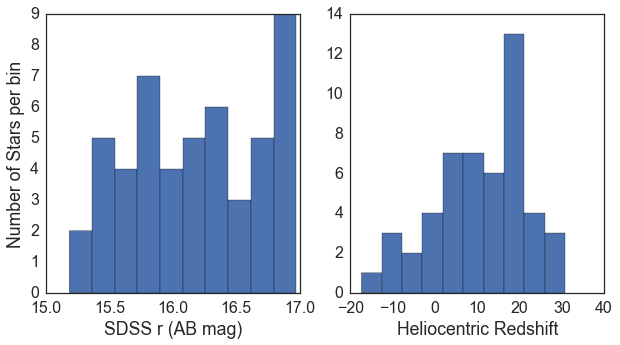

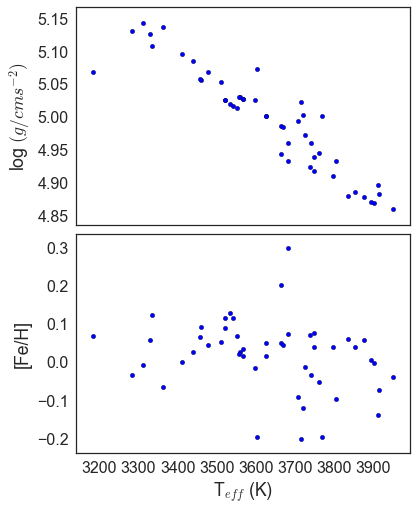

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
_, _, _ = ax1.hist(input_data['MAG'])
ax1.set_ylabel('Number of Stars per bin')
ax1.set_xlabel('SDSS r (AB mag)')

_, _, _ = ax2.hist(input_data['REDSHIFT'] * LIGHT)
ax2.set_xlabel('Heliocentric Redshift')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))
ax1.scatter(input_data['TEFF'], input_data['LOGG'])
ax1.set_ylabel('log $(g / cm s^{-2})$')
ax1.margins(0.05)

ax2.scatter(input_data['TEFF'], input_data['FEH'])
ax2.set_xlabel('T$_{eff}$ (K)')
ax2.set_ylabel('[Fe/H]')
ax2.margins(0.05)
fig.subplots_adjust(hspace=0.04)

In [34]:
seed = 123
star = STAR(normfilter=normfilter)
flux, wave, meta = star.make_templates(seed=seed, mag=mag, redshift=redshift, input_data=input_data)
print(meta)

INFO:io.py:611:read_basis_templates: Reading /Users/ioannis/research/projects/desi/spectro/templates/basis_templates/v2.2/star_templates_v2.1.fits


INFO:DESI:Reading /Users/ioannis/research/projects/desi/spectro/templates/basis_templates/v2.2/star_templates_v2.1.fits


OBJTYPE TEMPLATEID    SEED      REDSHIFT   ... AGE    TEFF    LOGG      FEH     
                                           ... Gyr     K     m / s2             
------- ---------- ---------- ------------ ... ---- ------- ------- ------------
   STAR          0 2991312382  6.01848e-05 ... -1.0 3282.58 5.13229   -0.0315856
   STAR          1 3062119789  7.99531e-06 ... -1.0 3312.49 5.14478  -0.00470402
   STAR          2 1228959102  1.74716e-05 ... -1.0  3334.0 5.10969     0.125893
   STAR          3 1840268610  5.70486e-05 ... -1.0  3410.2 5.09782   0.00320513
   STAR          4  974319580  9.38985e-05 ... -1.0 3458.58 5.05803      0.09498
   STAR          5 2967327842  6.27923e-07 ... -1.0 3363.57 5.13803   -0.0633323
   STAR          6 2367878886   6.7137e-05 ... -1.0 3541.03 5.01888     0.117763
   STAR          7 3088727057  1.90811e-05 ... -1.0 3328.64 5.12838    0.0616664
   STAR          8 3090095699  -3.0621e-05 ... -1.0 3437.96 5.08739    0.0287824
   STAR          9 210933975